# **Make your first submission**

This notebook will walk you through all the basic steps required to make your first submission. This is an attempt to share my learnings with you.
<br> This book can be a good starting point if you are new to Kaggle or new to competitions (like me 😅)

Note: This book is not a good source to better understand data or for ML modelling.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**What should your submission look like**

In [ ]:
sample_submission = pd.read_csv('/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/sample_submission.csv')
sample_submission.head(5)

In [ ]:
training_data = pd.read_csv('/kaggle/input/jpx-tokyo-stock-exchange-prediction/train_files/stock_prices.csv')
training_data.head(5)

The stocks are ranked based on the column 'Target'. The calculation for the 'Target' column will be discussed in the subsequent cells. 
<br>The returns are then calculated by considering long positions on the top 200 ranked stocks and short positions on the stocks ranked 1800-1999. You can find the function for this under competition overview. 

## Calculations for the 'Target' column

   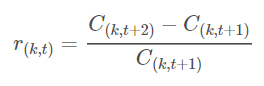
   
   The target column is calculated based on the closing prices of t+2 and t+1 days. 
   
   <br> To understand this better lets consider just one security.

In [ ]:
tmpdf = training_data[training_data["SecuritiesCode"]==1301].reset_index(drop=True)
tmpdf.head(5)

In [ ]:
tmpdf["Close_shift1"] = tmpdf["Close"].shift(-1)
tmpdf["Close_shift2"] = tmpdf["Close"].shift(-2)

tmpdf["rate"] = (tmpdf["Close_shift2"] - tmpdf["Close_shift1"]) / tmpdf["Close_shift1"]
tmpdf

Note: In the above table you can verify the target column with the values in the rate column

### Ranking
Now that we have understood how the 'Target' is calculated lets move on to ranking. 
<br> Ranking is pretty straightforward. A rank is assigned to the security for each day based on the magnitude of 'Target'. Higher the 'Target' value smaller the rank and vice-versa. 

Ranking all the securities in the training table.

In [ ]:
training_data['Rank'] = training_data.groupby('Date')['Target'].rank(ascending=False,method = 'first') - 1
#The '-1' at the end is very important. If not used it might throw an error during the final submission since the ranks need to be between 0 and 1999

In [ ]:
training_data

The dataset which will be updated timely and should be used for the final submission is 

In [ ]:
stock_prices = pd.read_csv('/kaggle/input/jpx-tokyo-stock-exchange-prediction/supplemental_files/stock_prices.csv')
stock_prices.head(5)

In [ ]:
stock_prices['Date'].max()

### Note: I will be skipping the spread return calculations for the time being. But you can find the function which is used to calculate this in the the competition overview (Sharpe Ratio)

To understand how submission is going to work we will calculate and submit ranks for the last date available to us i.e 2022-02-28

In [ ]:
stock_prices['Rank'] = stock_prices.groupby('Date')['Target'].rank(ascending=False,method = 'first') - 1
stock_prices = stock_prices.fillna(0)
stock_prices['Rank'] = stock_prices['Rank'].astype(int)

final_day = stock_prices[stock_prices["Date"]=="2022-02-28"].reset_index(drop=True)
final_day

In [ ]:
final_day_dict = dict(zip(final_day["SecuritiesCode"],final_day["Rank"]))

Create the environment.
These 3 lines of code are also provided in the competition overview

In [ ]:
import jpx_tokyo_market_prediction
env = jpx_tokyo_market_prediction.make_env()
iter_test = env.iter_test()

In [ ]:
for (prices, options, financials, trades, secondary_prices, sample_prediction) in iter_test:
    
    break

In [ ]:
sample_prediction.head()

**For understanding how submission is done we will use the same ranks as on 2022-02-28 and just map them to the respective securities in sample_submission**

In [ ]:
sample_prediction["Rank"]  = sample_prediction["SecuritiesCode"].map(final_day_dict)
sample_prediction

In [ ]:
env.predict(sample_prediction)

In [ ]:
for (prices, options, financials, trades, secondary_prices, sample_prediction) in iter_test:
    
    sample_prediction['Rank'] = sample_prediction["SecuritiesCode"].map(final_day_dict)
    env.predict(sample_prediction)

After running the notebook till this point you need to do the following 

Settings -> Internet -> off


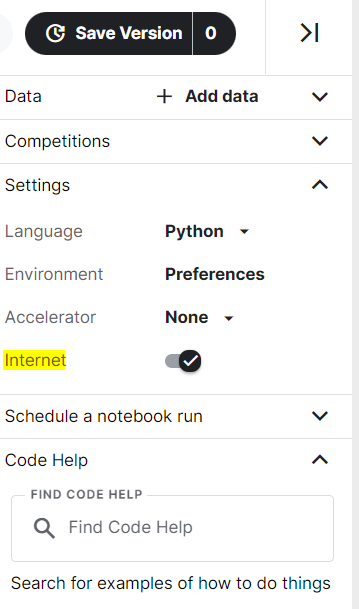

After this click on save version, give it a name and click save. 

Now go to the competition overview page and click on submit prediction, select the correct name and version of your notebook and hit submit. 

This will be your first submission. 
<br> You can check your score on the leaderboard and under my sumbissions.  

### Thank you for reading

Reference and a lot of the code samples are borrowed from chumajin's [notebook](https://www.kaggle.com/code/chumajin/easy-to-understand-the-competition/notebook).
Do check this book out to dive in further. 

Best of Luck :)

